A Árvore de Decisão - Algoritmos de Aprendizado de Máquinas

Dataset utilizado é o da flor iris

In [ ]:
# Importando as Bibliotecas 
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
# Retornando os Dados
df = load_iris()

In [ ]:
# Transformando em um DataFrame
iris = pd.DataFrame(df.data)
iris.columns = df.feature_names
iris['target'] = df.target
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Comecando apenas com o target 0 e 1 e apenas as colunas de petala

In [ ]:
# Selecionando apenas as colunas de petalas e esses targets
iris1 = iris.loc[iris.target.isin([0,2]), ['petal length (cm)',	'petal width (cm)',	'target']]

# X = iris1.values
# y = iris.loc[iris.target.isin([0,1]), 'target']


In [ ]:
# Separando X e y 
X = iris1.drop('target', axis=1)
y = iris1.target
# y_train = y_train.map({'setosa': 0, 'versicolor': 1})


In [ ]:
# Fazendo o  train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=33, random_state=42)

Podemos vizualizar graficamente os dados de treino dessa base usando o matplotlib

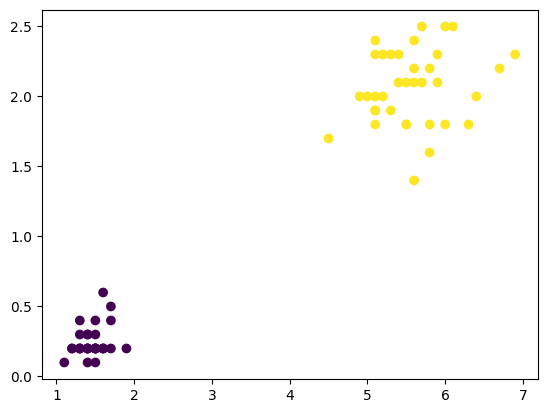

In [ ]:
# Visualizando as dados de treino 
import matplotlib.pyplot as plt
# !pip install --upgrade matplotlib
import numpy as np
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
# Importando a arvore de decisao
from sklearn import tree

In [ ]:
# Colentando o classidicador
clf = tree.DecisionTreeClassifier()
# Fazendo o fit com os daods de treino
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Verificando o score
clf.score(X_train, y_train)

1.0

[Text(0.5, 0.75, 'x[1] <= 1.0\ngini = 0.497\nsamples = 67\nvalue = [31, 36]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]')]

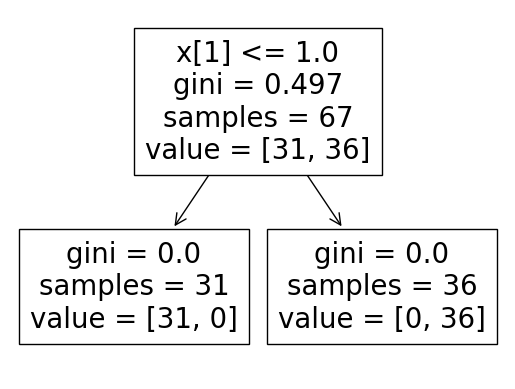

In [ ]:
# Visualizando essa arvore
tree.plot_tree(clf)

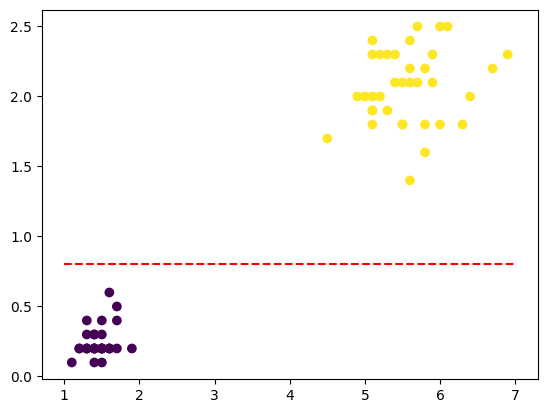

In [ ]:
# Podemos adicionar essas regras no nosso grafico

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train)

# ax.set(xlim=(3,7), xticks=(3,4,5,6,7),
#        ylim=(0.9,2.7), yticks=(1,1.5,2,2.5))

ax.plot([1,7],[0.8,0.8],'--r')
# ax.plot([5.05,5.05],[0.9,2.7],'--r')
# ax.plot([2.9, 5.05],[1.9,1.9],'--r')
# ax.plot([2.9, 5.05],[1.65,1.65],'--r')
# ax.plot([4.65, 4.65],[1.65,1.9],'--r')

plt.show()

In [ ]:
# Fazendo a previsao e avaliando o erro
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

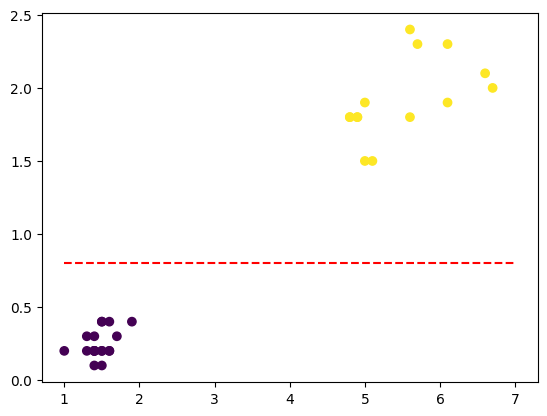

In [ ]:
# Visualizar  esses dados de teste no grafico acima
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test)

# ax.set(xlim=(3,7), xticks=(3,4,5,6,7),
#        ylim=(0.9,2.7), yticks=(1,1.5,2,2.5))

ax.plot([1,7],[0.8,0.8],'--r')
# ax.plot([5.05,5.05],[0.9,2.7],'--r')
# ax.plot([2.9, 5.05],[1.9,1.9],'--r')
# ax.plot([2.9, 5.05],[1.65,1.65],'--r')
# ax.plot([4.65, 4.65],[1.65,1.9],'--r')

plt.show()

In [ ]:
# Podemos entao fazer para toda base 
dataFrame_iris = pd.DataFrame(df.data)
dataFrame_iris.columns = df.feature_names
dataFrame_iris['target'] = df.target
# dataFrame_iris.head(3)

# separando X e Y da base de dados
X_todo = dataFrame_iris.drop('target', axis=1)
y_todo = dataFrame_iris.target

In [ ]:
# fazendo o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_todo, y_todo, test_size=30, random_state=1)

In [ ]:
# Criando o Classificador e fazendo o fit
# arvore_decisao = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
arvore_decisao = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [ ]:
arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# Verificando Score
arvore_decisao.score(X_train, y_train)

0.9916666666666667

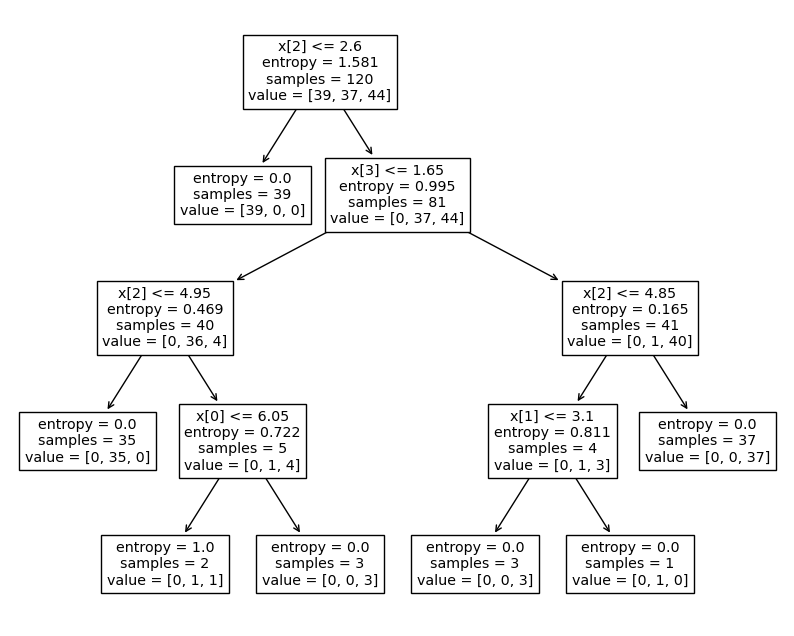

In [ ]:
# Visualizando essa arvore

fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore_decisao)

plt.show()

In [ ]:
# Fazendo a previsao
y_pred2 = clf2.predict(X_test)

In [ ]:
# Avalindo o modelo
confusion_matrix(y_test, y_pred2)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
# Acuracia do Algoritmo de Arvore de Desicao
from sklearn.metrics import accuracy_score
acuraciaAD = accuracy_score(y_test, y_pred2)

print("Acuracia do Algoritmo de Arvore de Desicao: ", acuraciaAD)

Acuracia do Algoritmo de Arvore de Desicao:  0.9666666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Acuraacia do KNN
y_pred_knn = knn.predict(X_test)
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print("Acuracia do Algoritmo de KNN: ", acuracia_knn)


# Acuracia do Naive Bayes

y_pred_gnb = gnb.predict(X_test)
acuracia_gnb = accuracy_score(y_test, y_pred_gnb)
print("Acuracia do Algoritmo de Naive Bayes: ", acuracia_gnb)

Acuracia do Algoritmo de Arvore de Desicao:  1.0
Acuracia do Algoritmo de Arvore de Desicao:  0.9666666666666667


# Redes Neurais Artificiais 

In [65]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [52]:
# Carregando o dataset
iris_data = load_iris()

# dividindo os dados em variaveis de entrada e saida
X = iris_data.data
Y = iris_data.target

In [53]:
# dividindo os dados em conjutos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
# transformando os rotulos em variaveis categoricas
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
# criando o modelo
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [56]:
# compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
historico = model.fit(X_train, y_train, validation_split=.1,  epochs=50,  batch_size=5, verbose=1)

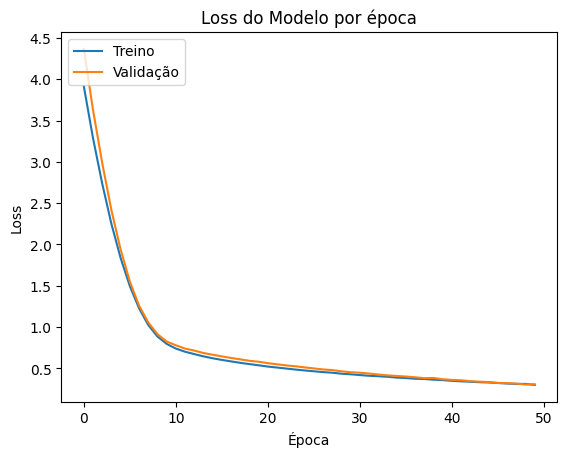

In [58]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Loss do Modelo por época")
plt.ylabel("Loss")
plt.xlabel("Época")
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

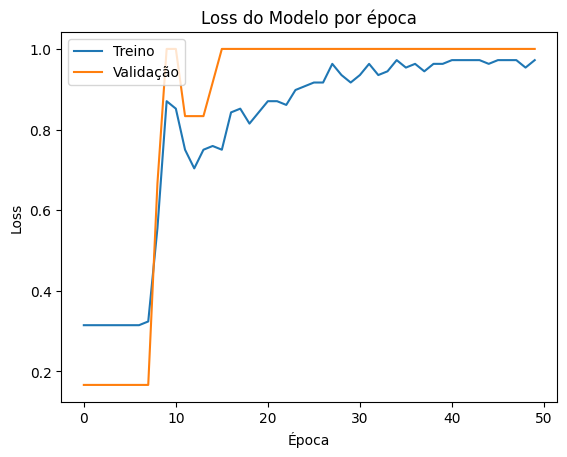

In [60]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Loss do Modelo por época")
plt.ylabel("Loss")
plt.xlabel("Época")
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

In [69]:
# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Acuracia do modelo: %.2f' %(accuracy*100))

1/1 [==============================] - 0s 20ms/step - loss: 0.2621 - accuracy: 0.9667
Acuracia do modelo: 96.67


A acurácia do Algoritmo de Árvore de Decisão

*   0.9666666666666667

A acurácia do Algoritmo de KNN

*   1.0


A acurácia do Algoritmo de Naive Bayes

*   0.9666666666666667

O Algoritmo de Árvore de Decisão e o Algoritmo de Naive Bayes
deram valores iguais ja do KNN deu overfitting

# Acuraucia da modelo de utiliazando redes neurais artificiais

Acuracia do modelo: 96.67
